## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

#Classification Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')

## **Load training and test sets**

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = train_df.set_index("PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Exploratory Data Analysis**

In [3]:
#General Info:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
#Statistical Summary for Numerical Features:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#Check for duplicate rows:
train_df.duplicated(subset="Name",keep=False).sum()

0

- There are no duplicate names. Let's check for duplicates in Tickets:

In [6]:
train_df[train_df.duplicated(subset="Ticket",keep=False)].sort_values("Ticket").head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C


- There are many duplicate ticket numbers, but each entry represents a different passenger, so we will keep them.

In [7]:
#Check for missing values:
train_df.isnull().sum()/len(train_df)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

- **19.86%** of the entries in the **"Age"** column are missing. We may try to impute them or drop the missing rows from the data
- **77.10%** of the entries in the **"Cabin"** column are missing. We may drop this column from the data as it doesn't provide reliable information.
- **0.224%** of the entries in the **"Embarked"** column are missing. Removing them from the data won't cause an issue.

In [8]:
test_df.isnull().sum()/len(test_df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

- Some entries are missing in the test dataset as well, so we have to find a way to deal with missing values if we decide to keep these features.

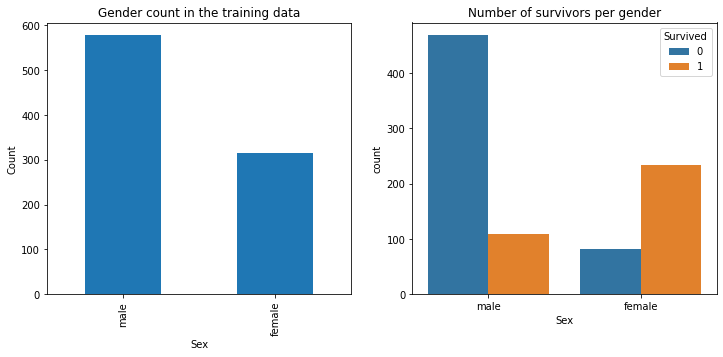

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
train_df["Sex"].value_counts().plot(kind='bar',
                                    title= "Gender count in the training data",
                                    xlabel= 'Sex',
                                    ylabel= 'Count',
                                    ax=ax[0])

ax[1].set_title("Number of survivors per gender")
sns.countplot(data=train_df, 
              x="Sex",
              hue="Survived",
              ax=ax[1])

plt.show()

- There's more males than females in the dataset.
- Females survived more than males despite having a lower total count.
- around 75% of females survived vs. only around 19% of males.

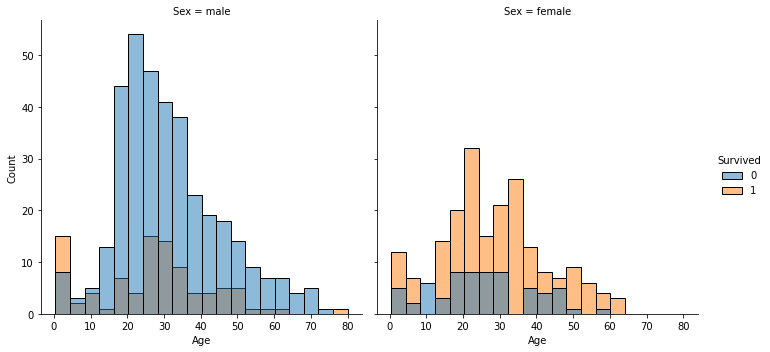

In [10]:
sns.displot(data=train_df,
            x="Age",
            col="Sex",
            hue="Survived");

- Is seems like younger passengers (<10) had a higher chance of survival than older passengers.

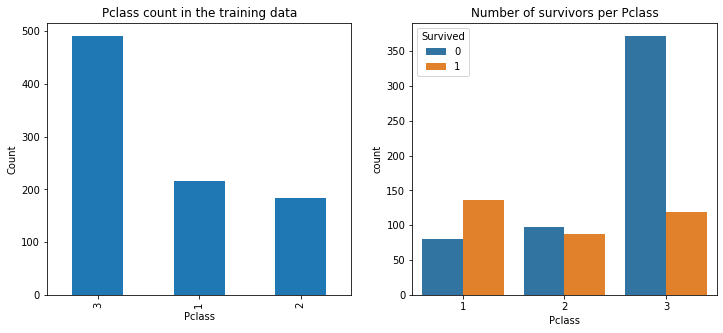

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
train_df["Pclass"].value_counts().plot(kind='bar',
                                    title= "Pclass count in the training data",
                                    xlabel= 'Pclass',
                                    ylabel= 'Count',
                                    ax=ax[0])

ax[1].set_title("Number of survivors per Pclass")
sns.countplot(data=train_df, 
              x="Pclass",
              hue="Survived",
              ax=ax[1])

plt.show()

- Passengers in the 1st class seem to have a better chance of survival than 2nd and 3rd classes

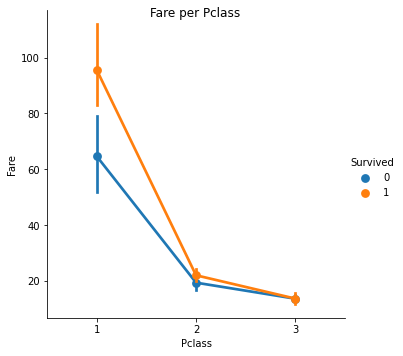

In [12]:
ax = sns.catplot(kind="point",
                 data=train_df,
                 x="Pclass", 
                 y="Fare",
                 hue="Survived")
ax.fig.suptitle('Fare per Pclass')
plt.show()

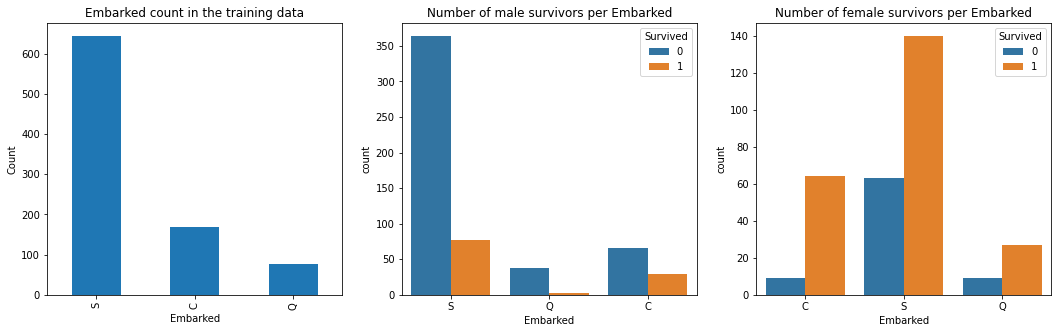

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
train_df["Embarked"].value_counts().plot(kind='bar',
                                         title= "Embarked count in the training data",
                                         xlabel= 'Embarked',
                                         ylabel= 'Count',
                                         ax=ax[0])

ax[1].set_title("Number of male survivors per Embarked")
sns.countplot(data=train_df[train_df["Sex"]=="male"], 
              x="Embarked",
              hue="Survived",
              ax=ax[1])

ax[2].set_title("Number of female survivors per Embarked")
sns.countplot(data=train_df[train_df["Sex"]=="female"], 
              x="Embarked",
              hue="Survived",
              ax=ax[2])

plt.show()

- most males embarked in Queenstown didnot survive.
- passengers embarking in Cherbourg had higher survival rate than Queenstown and Southampton.

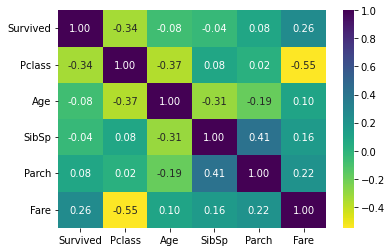

In [14]:
sns.heatmap(train_df.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

## **Preprocessing**

#### Drop null values in "Embarked"

In [15]:
train_df.dropna(subset=["Embarked"], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     202 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


#### Encode "Sex" and "Embarked" features

In [16]:
for df in [train_df, test_df]:
    df["Sex"] = df["Sex"].map({"male":1, "female":0, 1:1, 0:0})
    
    # Use onehotencoder method on "Embarked":
    df[['Embarked_Q', 'Embarked_S']] = pd.get_dummies(df["Embarked"], drop_first=True)
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


#### Add "travelled_alone" feature that determines whether a passenger is travelling alone or with family

In [17]:
for df in [train_df, test_df]:
    df['relatives'] = df['SibSp'] + df['Parch'] # Total number of relatives.
    
    df.loc[df['relatives'] > 0, 'travelled_alone'] = 0
    df.loc[df['relatives'] == 0, 'travelled_alone'] = 1
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,relatives,travelled_alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,1,0.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1.0


#### Split training data into training and validation sets

In [18]:
selected_features=["Pclass", "Sex", "Age", "SibSp", "Parch","Fare", "Embarked_Q", "Embarked_S", "travelled_alone"]

X_train, X_val, y_train, y_val = train_test_split(train_df[selected_features],
                                                  train_df["Survived"],
                                                  test_size = 0.1,
                                                  stratify = train_df["Survived"],
                                                  random_state=0)

X_test = test_df[selected_features]

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,travelled_alone
PassengerId,,,,,,,,,
891,3,1,32.0,0,0,7.7500,1,0,1.0
787,3,0,18.0,0,0,7.4958,0,1,1.0
837,3,1,21.0,0,0,8.6625,0,1,1.0
377,3,0,22.0,0,0,7.2500,0,1,1.0
23,3,0,15.0,0,0,8.0292,1,0,1.0


#### Fill null values in every feature with its mean

In [19]:
for df in [X_train, X_val, X_test]:
    df.fillna(X_train.mean(), inplace=True)
    
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 891 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           800 non-null    int64  
 1   Sex              800 non-null    int64  
 2   Age              800 non-null    float64
 3   SibSp            800 non-null    int64  
 4   Parch            800 non-null    int64  
 5   Fare             800 non-null    float64
 6   Embarked_Q       800 non-null    uint8  
 7   Embarked_S       800 non-null    uint8  
 8   travelled_alone  800 non-null    float64
dtypes: float64(3), int64(4), uint8(2)
memory usage: 51.6 KB


#### Normalize "Age" and "Fare" features

In [20]:
sc = StandardScaler()
scaled_features = ["Age", "Fare"]

sc.fit(X_train[scaled_features])

for df in [X_train, X_val, X_test]:
    df[scaled_features] = sc.transform(df[scaled_features])
    
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,travelled_alone
count,800.000000,800.000000,8.000000e+02,800.000000,800.000000,8.000000e+02,800.000000,800.000000,800.000000
mean,2.322500,0.652500,7.951972e-17,0.533750,0.385000,9.284240e-17,0.082500,0.735000,0.597500
std,0.830274,0.476474,1.000626e+00,1.105843,0.798481,1.000626e+00,0.275297,0.441609,0.490708
min,1.000000,0.000000,-2.251260e+00,0.000000,0.000000,-6.388750e-01,0.000000,0.000000,0.000000
25%,2.000000,0.000000,-5.669518e-01,0.000000,0.000000,-4.793452e-01,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000e+00,0.000000,0.000000,-3.479127e-01,0.000000,1.000000,1.000000
75%,3.000000,1.000000,4.476917e-01,1.000000,0.000000,-2.491153e-02,0.000000,1.000000,1.000000
max,3.000000,1.000000,3.491622e+00,8.000000,6.000000,9.674286e+00,1.000000,1.000000,1.000000


## **Model Testing**

#### Evaluation Functions

In [21]:
#Estimate model performance:
def estimate_model(model, X_train, y_train, X_val, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    print(f"  Training set Accuracy   = {model.score(X_train, y_train):.4%}\n  Validation set Accuracy = {model.score(X_val, y_val):.4%}\n")
    print("  Validation set Classification Report:")
    print(classification_report(y_val, y_pred_val, digits=4))
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].set_title("Training Set Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax[0], 
                          cmap="cividis", xticks_rotation="vertical")
    
    ax[1].set_title("Validation Set Confusion Matrix")
    plot_confusion_matrix(model, X_val, y_val, ax=ax[1],
                          cmap="cividis", xticks_rotation="vertical")
    
    
#View the most predictive features from any tree-based model:
def feature_importance(model):
    importance = pd.DataFrame(model.feature_importances_, index= X_train.columns).sort_values(0)
    importance.plot(kind='barh', title="Feature Importance"), plt.show()
    
    
def coss_val(model,X,y,cv=10):
    scores=cross_val_score(model, X, y, cv=cv)
    print("Cross Validation:\n  %0.5f accuracy with a standard deviation of %0.5f \n" % (scores.mean(), scores.std()))

Support Vector Classifier:
  Training set Accuracy   = 84.2500%
  Validation set Accuracy = 84.2697%

  Validation set Classification Report:
              precision    recall  f1-score   support

           0     0.8475    0.9091    0.8772        55
           1     0.8333    0.7353    0.7812        34

    accuracy                         0.8427        89
   macro avg     0.8404    0.8222    0.8292        89
weighted avg     0.8421    0.8427    0.8405        89



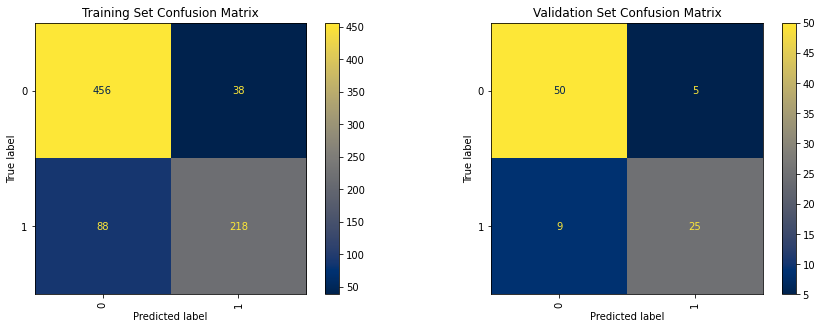

In [22]:
print("\033[1mSupport Vector Classifier:\033[0m")
model = SVC(C=11,
            kernel="rbf",
            gamma="scale",
            break_ties=True,
            random_state=0)


model.fit(X_train, y_train)
estimate_model(model, X_train, y_train, X_val, y_val)

K-Nearest Neighbour Classifier:
  Training set Accuracy   = 85.5000%
  Validation set Accuracy = 84.2697%

  Validation set Classification Report:
              precision    recall  f1-score   support

           0     0.9020    0.8364    0.8679        55
           1     0.7632    0.8529    0.8056        34

    accuracy                         0.8427        89
   macro avg     0.8326    0.8447    0.8367        89
weighted avg     0.8489    0.8427    0.8441        89



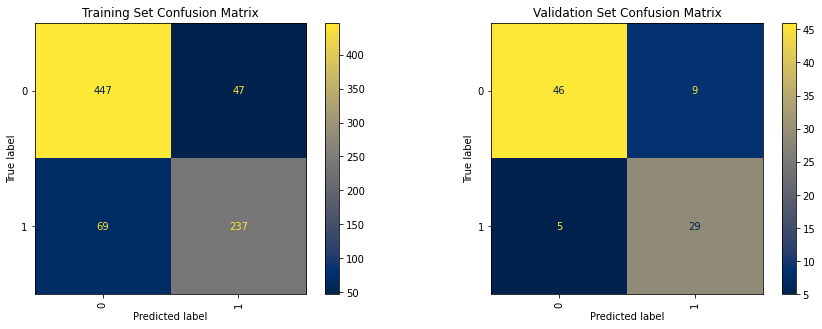

In [23]:
print("\033[1mK-Nearest Neighbour Classifier:\033[0m")
model = KNeighborsClassifier(n_neighbors=5,
                             p=3,
                             weights="uniform",
                             metric="minkowski",
                             n_jobs=-1)

model.fit(X_train, y_train)
estimate_model(model, X_train, y_train, X_val, y_val)

Random Forest Classifier:
Cross Validation:
  0.82125 accuracy with a standard deviation of 0.02257 

  Training set Accuracy   = 85.7500%
  Validation set Accuracy = 85.3933%

  Validation set Classification Report:
              precision    recall  f1-score   support

           0     0.8500    0.9273    0.8870        55
           1     0.8621    0.7353    0.7937        34

    accuracy                         0.8539        89
   macro avg     0.8560    0.8313    0.8403        89
weighted avg     0.8546    0.8539    0.8513        89



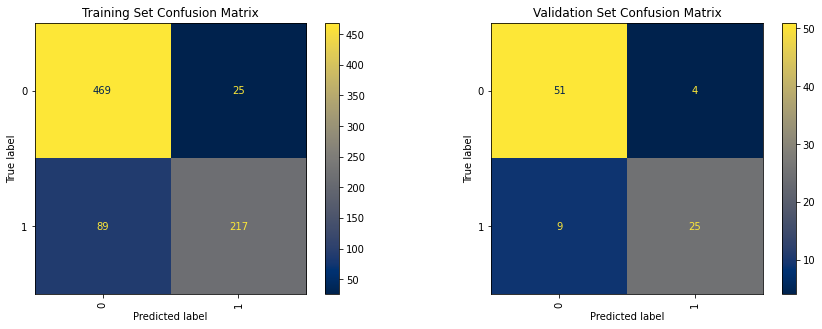

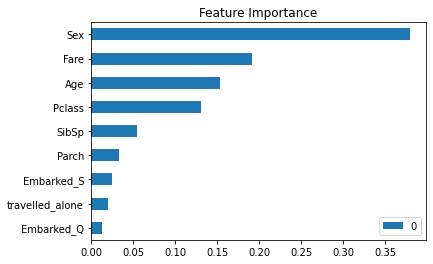

In [24]:
print("\033[1mRandom Forest Classifier:\033[0m")
model = RandomForestClassifier(n_estimators=100,
                               criterion="entropy",
                               max_depth=6,
                               min_samples_split=4,
                               bootstrap=True,
                               max_samples=0.8,
                               oob_score=True,
                               n_jobs=-1,
                               random_state=0)

model.fit(X_train, y_train)
coss_val(model,X_train, y_train, cv=5)
estimate_model(model, X_train, y_train, X_val, y_val)
feature_importance(model)

- Random Forest Seems to perform better than SVM and KNN, so we'll use it to predict the survivor in the test set.

## **Test Data predictions**

In [25]:
test_df["Survived"] = model.predict(X_test)
submission = test_df[["PassengerId", "Survived"]]
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
submission.to_csv('submission.csv', index=False)